In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
customer_df= pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
pd.set_option('display.max_columns', None)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# renaming and standardising the columns-

In [3]:

customer_df= customer_df.rename(columns={
    "Customer": "customer",
    "State": "state",
    "Customer Lifetime Value": "customer_lifetime_value",
    "Response": "response",
    "Coverage": "coverage",
    "Education": "education",
    "Effective To Date": "effective_to_date",
    "EmploymentStatus": "employment_status",
    "Gender": "gender",
    "Income": "income",
    "Location Code": "location_code",
    "Marital Status": "marital_status",
    "Monthly Premium Auto": "monthly_premium_auto",
    "Months Since Last Claim": "months_since_last_claim",
    "Months Since Policy Inception": "months_since_policy_inception",
    "Number of Open Complaints": "number_of_open_complaints",
    "Number of Policies": "number_of_policies",
    "Policy Type": "policy_type",
    "Policy": "policy",
    "Renew Offer Type": "renew_offer_type",
    "Sales Channel": "sales_channel",
    "Total Claim Amount": "total_claim_amount",
    "Vehicle Class": "vehicle_class",
    "Vehicle Size": "vehicle_size"
})

customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# changing the effective_to_date to datetime format-

In [4]:
customer_df['effective_to_date'].value_counts()

1/10/11    195
1/27/11    194
2/14/11    186
1/26/11    181
1/17/11    180
1/19/11    179
1/31/11    178
1/3/11     178
1/20/11    173
2/26/11    169
1/28/11    169
2/19/11    168
1/5/11     167
2/27/11    167
1/11/11    166
2/4/11     164
2/10/11    161
2/28/11    161
1/2/11     160
1/21/11    160
1/29/11    160
2/22/11    158
2/5/11     158
2/3/11     158
2/7/11     157
2/12/11    156
1/23/11    155
2/1/11     154
1/18/11    154
1/15/11    153
1/14/11    152
2/11/11    151
1/7/11     151
1/25/11    151
2/25/11    149
1/8/11     149
2/18/11    149
2/2/11     149
1/1/11     148
2/21/11    148
1/24/11    147
1/9/11     146
1/30/11    145
1/13/11    145
2/6/11     144
1/6/11     143
2/23/11    143
1/16/11    142
2/16/11    139
2/13/11    139
2/24/11    139
2/9/11     137
2/17/11    136
1/22/11    136
2/8/11     134
2/20/11    132
2/15/11    130
1/12/11    126
1/4/11     115
Name: effective_to_date, dtype: int64

In [5]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"], format="%m/%d/%y")
customer_df.head(10)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,2011-01-25,Employed,F,62902,Rural,Married,69,14,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2011-02-24,Employed,F,55350,Suburban,Married,67,0,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,2011-01-18,Unemployed,M,0,Urban,Single,101,0,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,2011-01-26,Medical Leave,M,14072,Suburban,Divorced,71,13,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2011-02-17,Employed,F,28812,Urban,Married,93,17,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


# creating a new dataframe called numerical_df-

In [6]:

numerical_df = customer_df.select_dtypes(np.number)
display(numerical_df.shape)
numerical_df.head()

(9134, 8)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [7]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employment_status                        object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

# Defining a function to differentiate between continous and discrete variables and also storing the unique values so that it can be used to find our continuous variables.


In [8]:


def get_continuous_discrete(df):
    continuous_df = pd.DataFrame()
    discrete_df = pd.DataFrame()
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals <= 10:
            discrete_df[col] = df[col]
        else:
            continuous_df[col] = df[col]
    return continuous_df, discrete_df

continuous_df, discrete_df = get_continuous_discrete(numerical_df)

display(discrete_df.shape)
discrete_df.head()

(9134, 2)

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [9]:
discrete_df['number_of_open_complaints'].value_counts()

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [10]:
continuous_df['customer_lifetime_value'].value_counts()

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [11]:
# displaying the continous_df dataframe.
display(continuous_df.shape)
continuous_df.head()

(9134, 6)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


# Displaying the correlation-

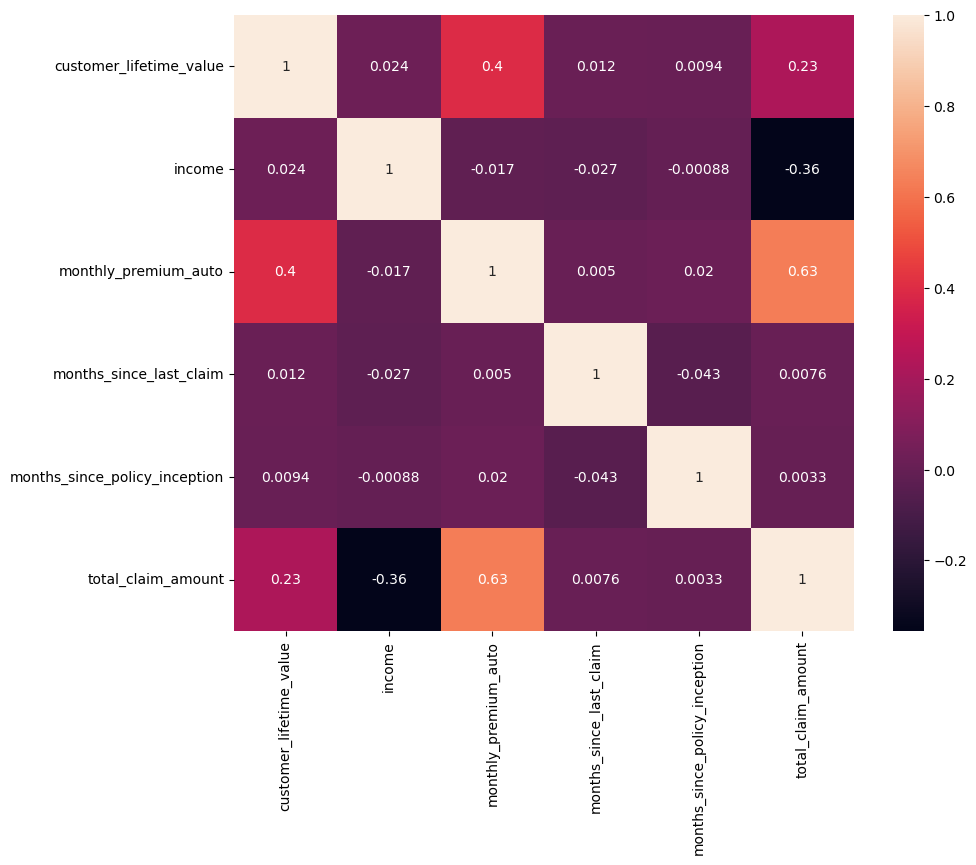

In [12]:
corr_matrix=continuous_df.corr() 
corr_matrix
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
#Montly_premium_auto has a correlation with total_claim_amount

# Creating functions to plot every discrete variables-

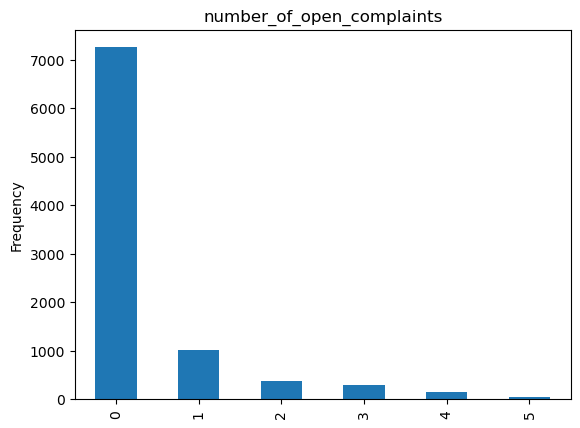

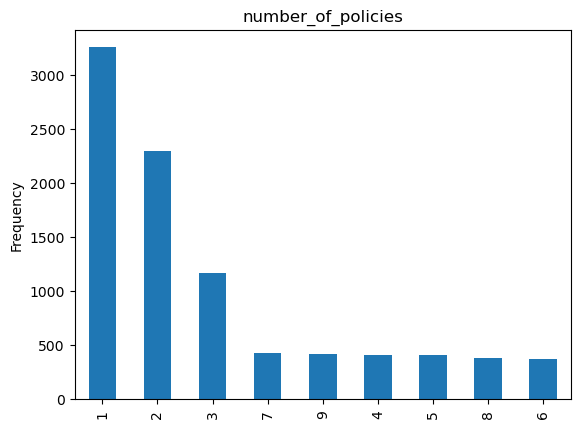

In [14]:


# def plot_disc_vars(df):
#     for col in df.columns:
        
        
def plot_discrete_vars(df):
    for col in df.columns:
        plt.figure()  # create a new figure
        df[col].value_counts().plot(kind='bar')# create a bar plot
        plt.ylabel('Frequency')
        plt.title(col)
        plt.show()    

plot_discrete_vars(discrete_df)

# Creating a function to plot every continuous variables

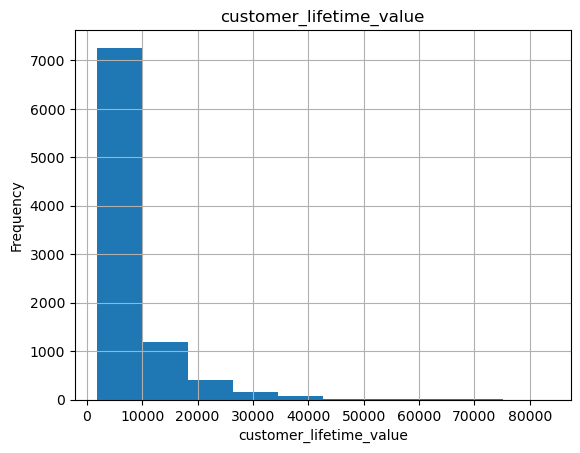

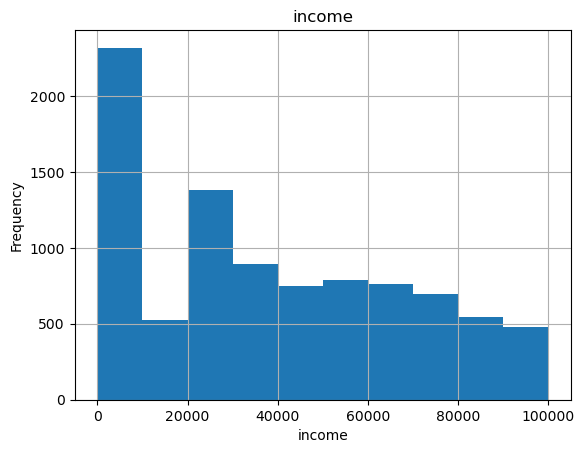

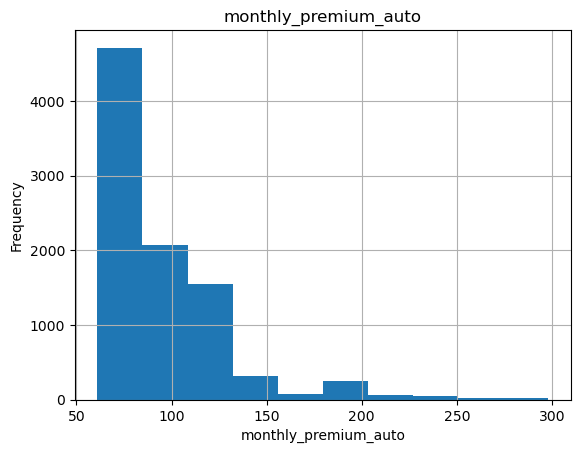

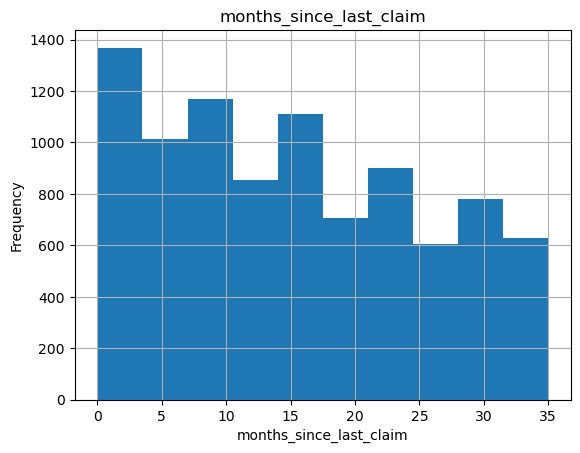

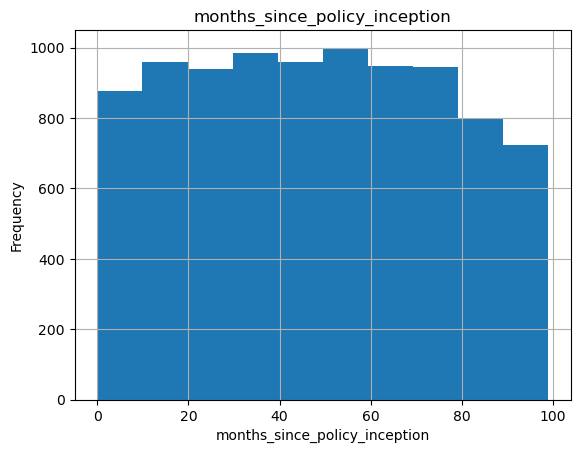

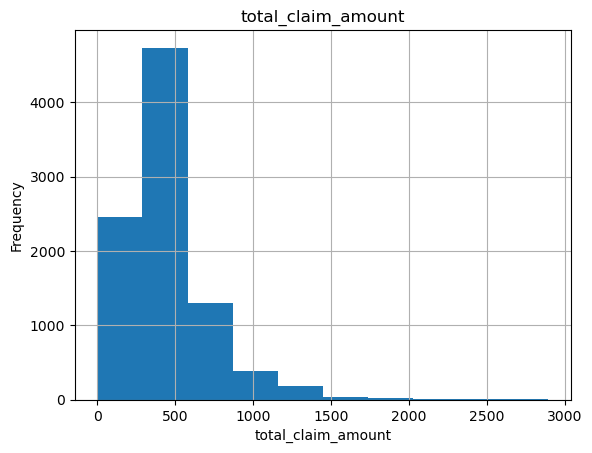

In [15]:

def plot_continuous_vars(df):
    for col in df.columns:
        plt.figure()
        #df[col].value_counts().hist()
        df[col].hist()  # create a histogram
        plt.title(col)  # add title
        plt.xlabel(col)  # add x-axis label
        plt.ylabel('Frequency')  # add y-axis label
        plt.show() 
        
plot_continuous_vars(continuous_df)

### customer_lifetime_value, monthly_premium_auto and total_claim_amount  have negative skews. income column has a little bit of negative skew but not that much compared to the others. months_since_last_claim and months_since_policy_inception has symmetrical distribution.


# Looking for outliers in the continuous variables-

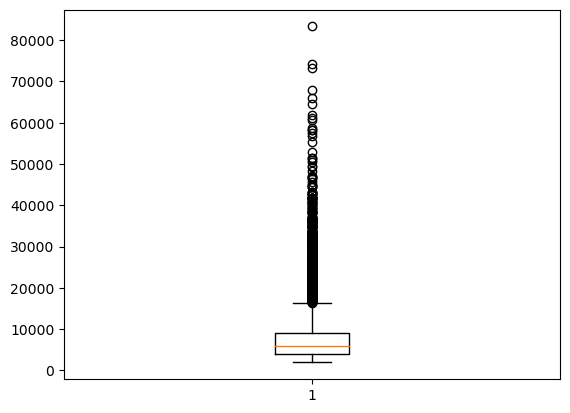

In [16]:
plt.boxplot(continuous_df['customer_lifetime_value'])
 
# show plot
plt.show()

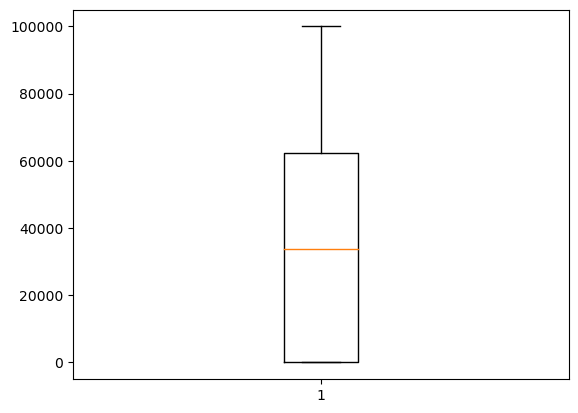

In [17]:
plt.boxplot(continuous_df['income'])
 
# show plot
plt.show()

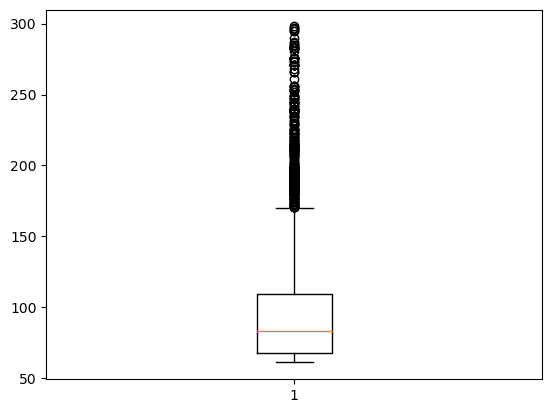

In [18]:
plt.boxplot(continuous_df['monthly_premium_auto'])
 
# show plot
plt.show()

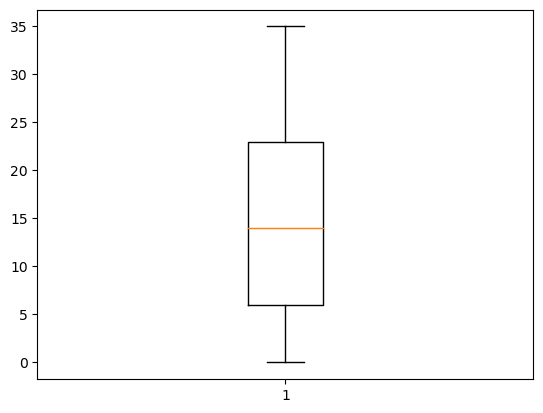

In [19]:
plt.boxplot(continuous_df['months_since_last_claim'])
 
# show plot
plt.show()

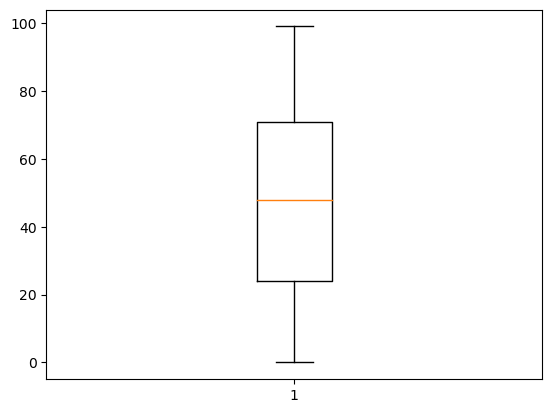

In [20]:
plt.boxplot(continuous_df['months_since_policy_inception'])
 
# show plot
plt.show()

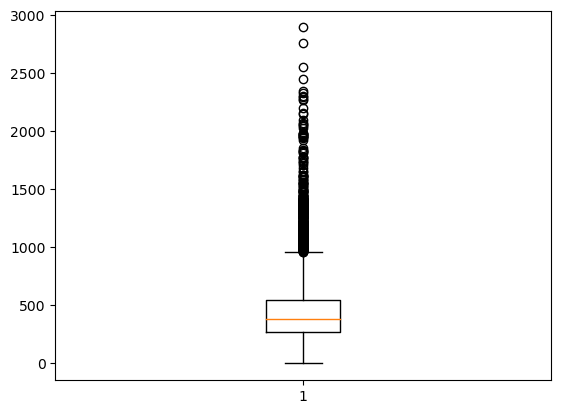

In [21]:
plt.boxplot(continuous_df['total_claim_amount'])
 
# show plot
plt.show()

### Since the outliers in the continuous variables are not that of a big size, i decided not to get rid of them.

# Checking for NaN values-

In [22]:
continuous_df.isna().sum()/len(continuous_df)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
total_claim_amount               0.0
dtype: float64

In [23]:
discrete_df.isna().sum()/len(discrete_df)

number_of_open_complaints    0.0
number_of_policies           0.0
dtype: float64

In [24]:
numerical_df.to_csv('numerical.csv', index=False)

# Here starts lab cleaning for categorical data-

In [25]:
categorical_df = customer_df.select_dtypes(object)
display(categorical_df.shape)
categorical_df.head()

(9134, 15)

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [26]:
categorical_df.isna().sum()/len(categorical_df)

customer             0.0
state                0.0
response             0.0
coverage             0.0
education            0.0
employment_status    0.0
gender               0.0
location_code        0.0
marital_status       0.0
policy_type          0.0
policy               0.0
renew_offer_type     0.0
sales_channel        0.0
vehicle_class        0.0
vehicle_size         0.0
dtype: float64

## Looking at the unique values-

In [27]:
for col in ['customer', 'state', 'response', 'coverage', 'education', 'employment_status', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']:
    print(f"Unique values for {col}:")
    print(customer_df[col].unique())
  

Unique values for customer:
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826']
Unique values for state:
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
Unique values for response:
['No' 'Yes']
Unique values for coverage:
['Basic' 'Extended' 'Premium']
Unique values for education:
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Unique values for employment_status:
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
Unique values for gender:
['F' 'M']
Unique values for location_code:
['Suburban' 'Rural' 'Urban']
Unique values for marital_status:
['Married' 'Single' 'Divorced']
Unique values for policy_type:
['Corporate Auto' 'Personal Auto' 'Special Auto']
Unique values for policy:
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
Unique values for renew_offer_type:
['Offer1' 'Offer3' 'Offer2' 'Offer4']
Unique values for sales_channel:
['Agent' 'Call Center' 'W

In [28]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

# Removing the alpha-numeric values-

In [29]:
import re

In [30]:
def cleancustomer(value):
    value = re.sub('\D', '', value)
    return value


In [31]:
categorical_df['customer'] = categorical_df['customer'].apply(cleancustomer)

In [33]:
categorical_df['customer'].unique()

array(['79786', '44356', '49188', ..., '14365', '19263', '167826'],
      dtype=object)

In [35]:
categorical_df.dtypes

customer             object
state                object
response             object
coverage             object
education            object
employment_status    object
gender               object
location_code        object
marital_status       object
policy_type          object
policy               object
renew_offer_type     object
sales_channel        object
vehicle_class        object
vehicle_size         object
dtype: object

In [40]:
categorical_df.isna().sum()/len(categorical_df)

customer             0.0
state                0.0
response             0.0
coverage             0.0
education            0.0
employment_status    0.0
gender               0.0
location_code        0.0
marital_status       0.0
policy_type          0.0
policy               0.0
renew_offer_type     0.0
sales_channel        0.0
vehicle_class        0.0
vehicle_size         0.0
dtype: float64

In [43]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [45]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

## I noticed that the columns policy_type and policy are related and i decided to eliminate those both and create a new column called policy_category to make the data easier.

In [48]:
# Create a new column combining the information from the "policy_type" and "policy" columns
categorical_df['policy_category'] = ''


for index, row in categorical_df.iterrows():
    if 'Personal' in row['policy']:
        categorical_df.at[index, 'policy_category'] = 'Personal'
    elif 'Corporate' in row['policy']:
        categorical_df.at[index, 'policy_category'] = 'Corporate'
    elif 'Special' in row['policy']:
        categorical_df.at[index, 'policy_category'] = 'Special'

In [51]:
categorical_df.drop(['policy', 'policy_type'], axis=1, inplace=True)

In [52]:
categorical_df.head()

,customer,state,response,coverage,education,employment_status,gender,location_code,marital_status,renew_offer_type,sales_channel,vehicle_class,vehicle_size,policy_category
0,79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Corporate
1,44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Offer3,Agent,Four-Door Car,Medsize,Personal
2,49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Offer1,Agent,Two-Door Car,Medsize,Personal
3,63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Offer1,Call Center,SUV,Medsize,Corporate
4,64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Offer1,Agent,Four-Door Car,Medsize,Personal


In [50]:
categorical_df['policy_category'].value_counts()

Personal     6788
Corporate    1968
Special       378
Name: policy_category, dtype: int64

In [53]:
categorical_df.to_csv('categorical.csv', index=False)